Epoch 1/150


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.4257 - loss: 0.2836 
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.4944 - loss: 0.2724
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - accuracy: 0.5302 - loss: 0.2629
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - accuracy: 0.6036 - loss: 0.2549
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - accuracy: 0.6431 - loss: 0.2480
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - accuracy: 0.6654 - loss: 0.2418
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - accuracy: 0.6837 - loss: 0.2363
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - accuracy: 0.6835 - loss: 0.2313
Epoch 9/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - accuracy: 0.6960 - loss: 0.2266
Epoch 10/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - accuracy: 0.6943 - loss: 0.2222
Epoch 11/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - accuracy: 0.6930 - loss: 0.2181
Epoch 12/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/ste

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0]

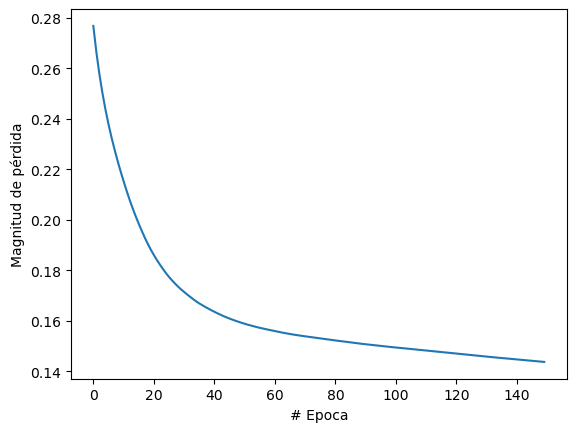

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
#Datos
#encabezado
#Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
total_data = pd.read_csv("DiabetesP.csv")

X = total_data.drop("8", axis = 1)
y = total_data["8"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

#se entrena el modelo
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import set_random_seed

set_random_seed(42)

model = Sequential()
model.add(Dense(12, input_shape = (8,), activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "mean_squared_error", optimizer = "SGD", metrics = ["accuracy"])
model

# Ajustar el modelo de keras en el conjunto de datos
historial=model.fit(X_train, y_train, epochs = 150, batch_size = 10)

import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

_, accuracy = model.evaluate(X_train, y_train)

print(f"Accuracy: {accuracy}")

y_pred = model.predict(X_test)
y_pred[:15]

#redondeo de la salida
y_pred_round = [round(x[0]) for x in y_pred]
y_pred_round[:15]



